In [2]:
import matplotlib.pyplot as plt
import seaborn.apionly as sns
import pandas as pd
import theano.tensor as tt
import pymc3 as pm

from sklearn import preprocessing

%matplotlib inline
plt.style.use('bmh')
colors = ['#348ABD', '#A60628', '#7A68A6', '#467821', '#D55E00',
          '#CC79A7', '#56B4E9', '#009E73', '#F0E442', '#0072B2']

messages = pd.read_csv('../../data/hangout_chat_data.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/apionly.py:9: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


In [3]:
# Convert categorical variables to integer
le = preprocessing.LabelEncoder()
participants_idx = le.fit_transform(messages['prev_sender'])
participants = le.classes_
n_participants = len(participants)

with pm.Model() as model:

    intercept = pm.Normal('intercept', mu=0, sd=100, shape=n_participants)
    slope_message_length = pm.Normal('slope_message_length', mu=0, sd=100)
    slope_is_weekend = pm.Normal('slope_is_weekend', mu=0, sd=100)
    slope_num_participants = pm.Normal('slope_num_participants', mu=0, sd=100)

    mu = tt.exp(intercept[participants_idx]
                + slope_message_length*messages.message_length
                + slope_is_weekend*messages.is_weekend
                + slope_num_participants*messages.num_participants)

    y_est = pm.Poisson('y_est', mu=mu, observed=messages['time_delay_seconds'].values)

    start = pm.find_MAP()
    step = pm.Metropolis()
    trace = pm.sample(200000, step, start=start, progressbar=True)

Sampling 2 chains for 1_000 tune and 200_000 draw iterations (2_000 + 400_000 draws total) took 435 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


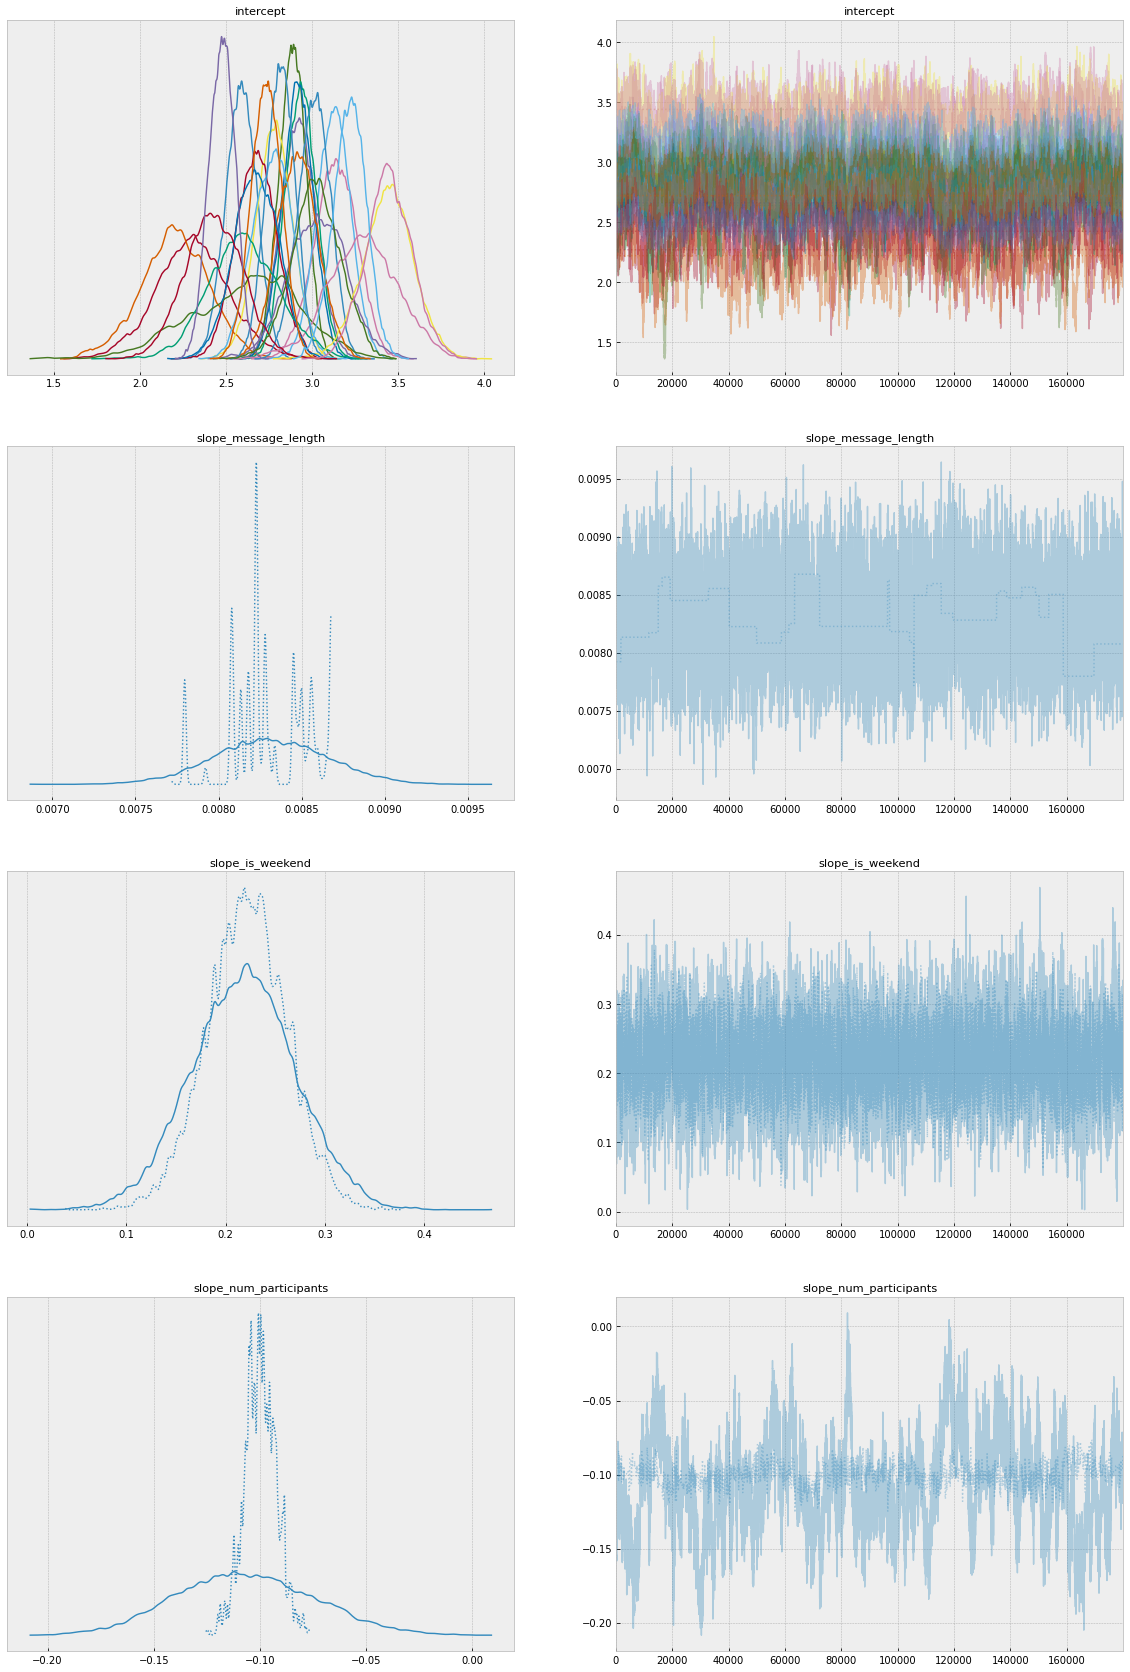

In [14]:
_ = pm.traceplot(trace[20000:], figsize=(20,30))

<Figure size 720x1440 with 0 Axes>

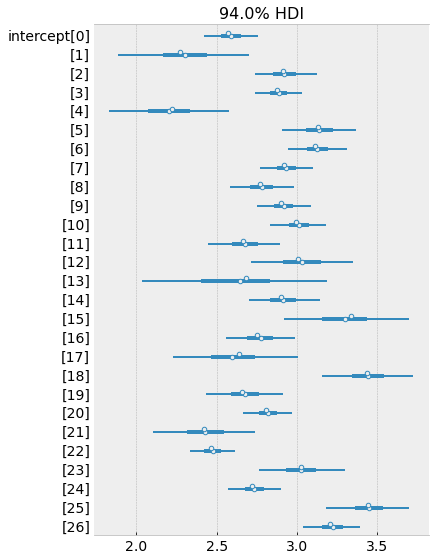

In [12]:
_ = pm.forestplot(trace[20000:], var_names=['intercept'])